# **Penguin Species Classification: A Decision Tree vs. Random Forest Study**

## The Data


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## **Imports**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("penguins_size.csv")

In [9]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## **Exploratory Data Analysis**


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [19]:
df = df.dropna()

In [21]:
#lets check the null count now 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [23]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [25]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

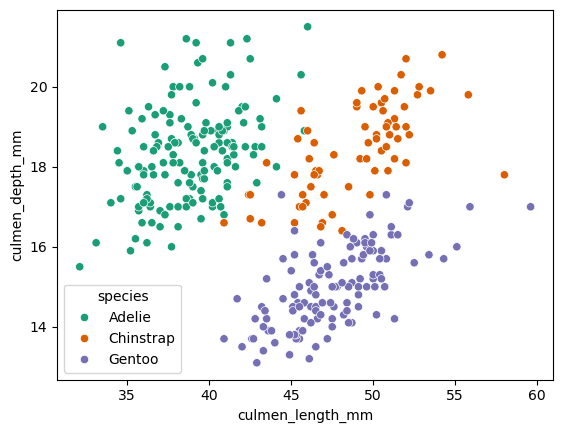

In [27]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

## Scatter Plot of Penguin Species by Culmen Measurements

This scatter plot visualizes the relationship between **culmen length** and **culmen depth** for different penguin species in the dataset. The plot is created using Seaborn's `scatterplot` function with the following settings:

### Observations:
- **Adelie penguins** (green) tend to have moderate culmen length and higher culmen depth.
- **Chinstrap penguins** (orange) have similar culmen lengths to Adelie but generally slightly higher culmen depths.
- **Gentoo penguins** (purple) have longer culmen lengths but shallower culmen depths compared to the other two species.

This plot helps in visually distinguishing the species based on their beak (culmen) characteristics, which could be useful for classification tasks or exploratory data analysis.


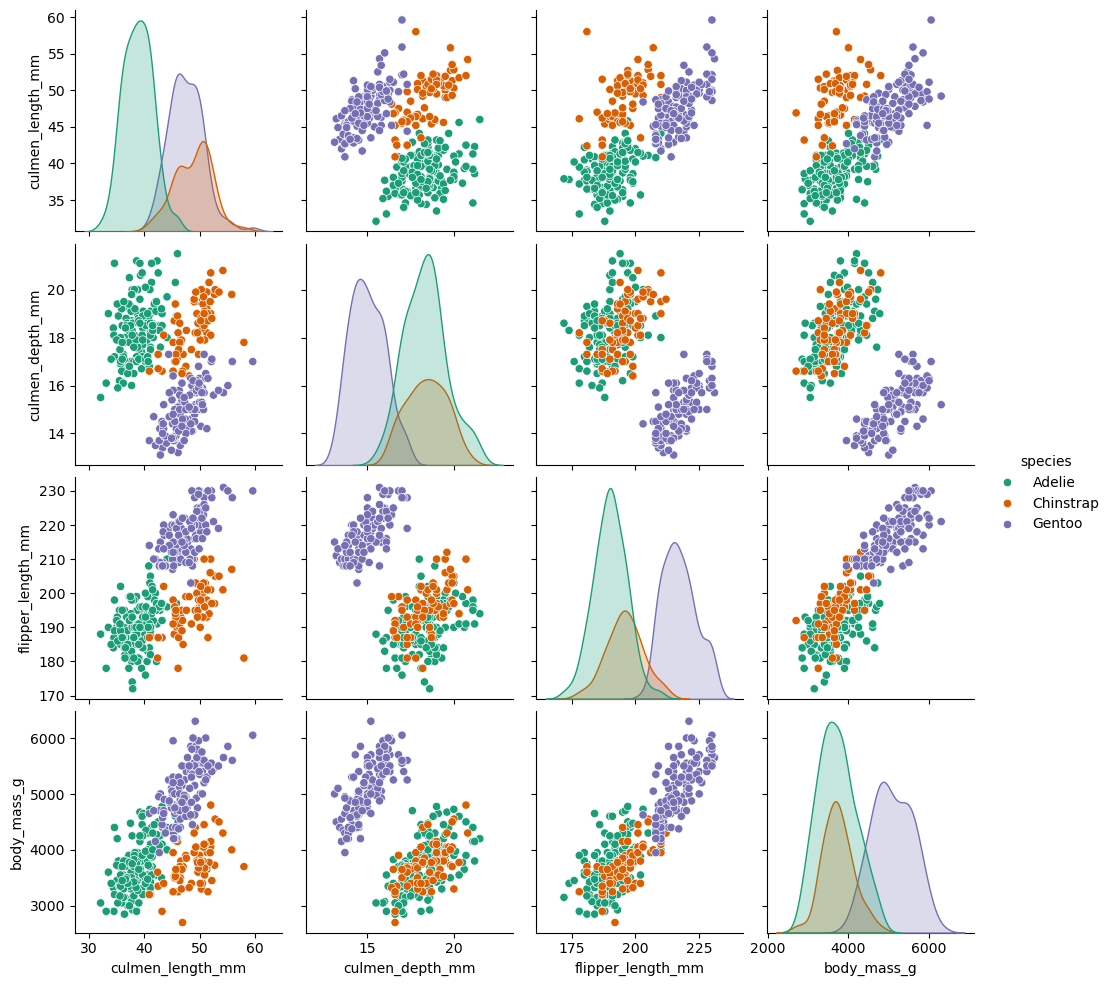

In [31]:
sns.pairplot(df,hue='species',palette='Dark2')

/var/folders/2k/2h026m417z1b3v_6p87mbf7c0000gn/T/ipykernel_74328/1926922542.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')


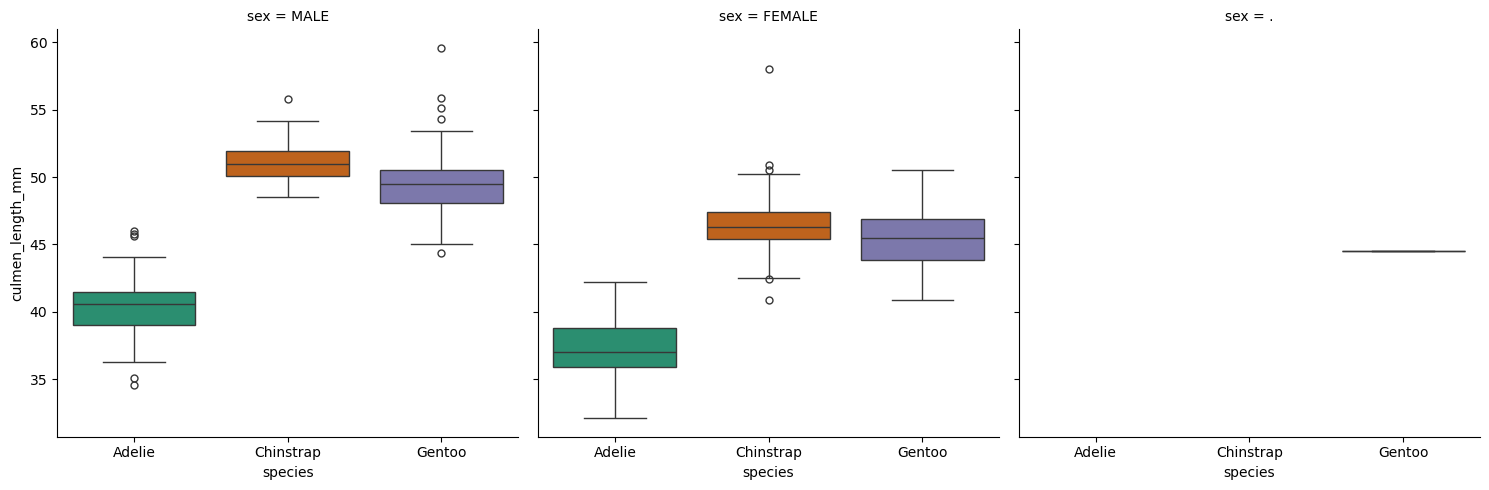

In [33]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Interpretation of Box Plot: Culmen Length by Species and Sex

This box plot displays the distribution of **culmen length (mm)** for each penguin **species**, broken down by **sex**.

### Key Insights:


- **Sex-Based Differences**:
  - In general, **male penguins** have longer culmen lengths compared to **females** across all species.
  - This suggests **sexual dimorphism** in beak size, which may be biologically significant.

- **Species Comparison**:
  - **Gentoo penguins** exhibit the **longest culmen lengths** among the three species.
  - **Adelie penguins** tend to have the **shortest culmen lengths**.
  - **Chinstrap penguins** fall in between Adelie and Gentoo in terms of culmen length.

- **Outliers**:
  - There are some outliers in each group, which may represent individual variation or data entry inconsistencies.

- **Missing Data**:
  - The third column in the plot (labeled `sex = .`) includes entries with missing or ambiguous sex values.
  - It only shows data for Gentoo penguins, suggesting sex information is missing for some individuals of that species.


## **Feature Engineering**

In [37]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,False,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,False,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,False,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,False,True,False


In [39]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


In [41]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

#### Default Hyperparameters

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()

In [52]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
base_pred = model.predict(X_test)

[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



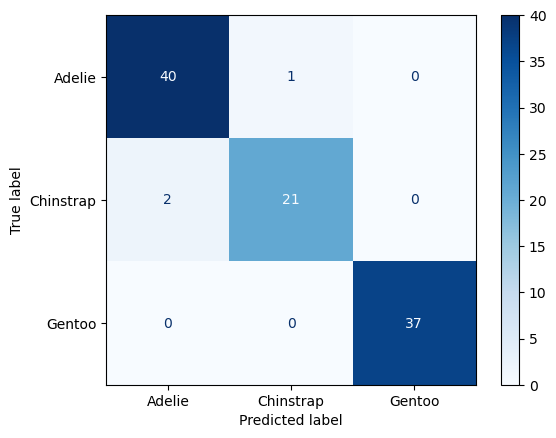

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Generate predictions (optional if not already done)
base_pred = model.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, base_pred))
print(classification_report(y_test, base_pred))

# Visualize confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')


In [62]:
model.feature_importances_

array([0.34600162, 0.04203954, 0.53120101, 0.00239775, 0.07836008,
       0.        , 0.        , 0.        ])

<Axes: xlabel='species', ylabel='body_mass_g'>

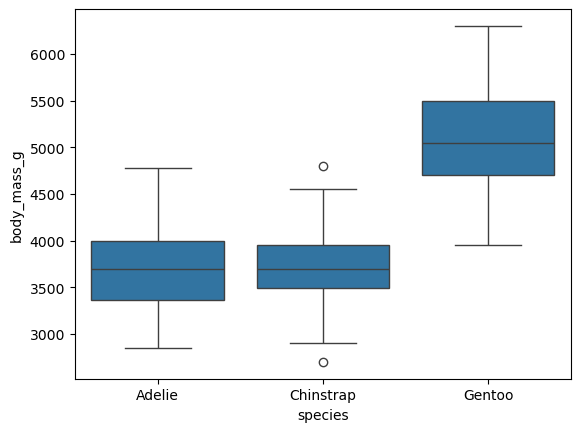

In [64]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Tree Visualization

In [67]:
from sklearn.tree import plot_tree

In [69]:
from sklearn.tree import plot_tree

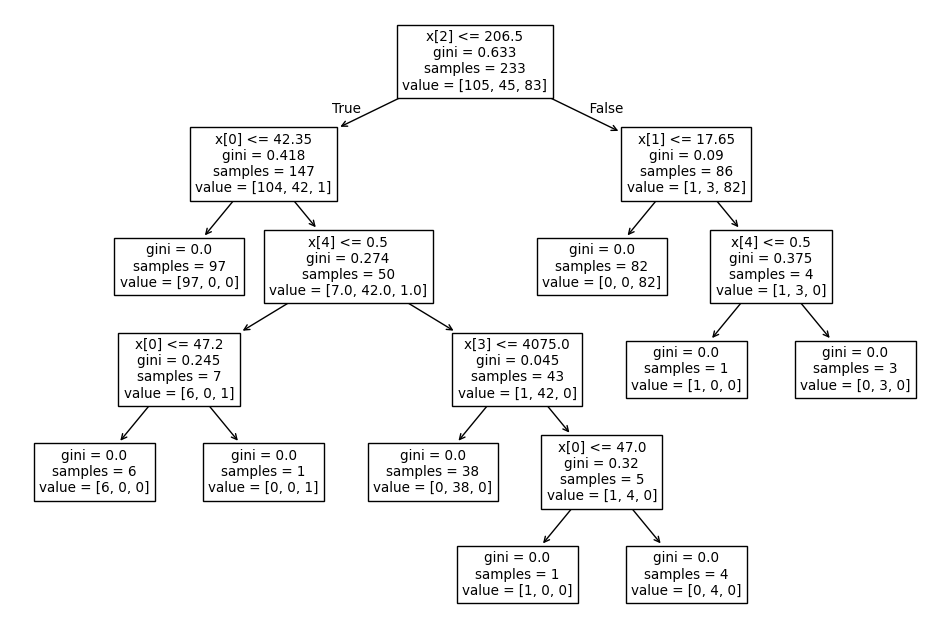

In [73]:
plt.figure(figsize=(12,8))
plot_tree(model);

### Key Elements in the Tree:

- **x[i]**: Represents the feature index used for splitting. For example, `x[2] <= 206.5` means the model is using feature 2 to split the data.
- **gini**: The Gini impurity of the node. A value of `0` indicates a pure node (only one class present).
- **samples**: Number of data points reaching that node.
- **value**: Class distribution at the node. Format: `[class_0_count, class_1_count, class_2_count]`.

### Interpretation:

- The **root node** splits the dataset on feature `x[2]` (possibly `flipper_length_mm` or another continuous variable), with a threshold of `206.5`.
- If the condition is `True`, the model further evaluates based on `x[0]`, `x[4]`, and `x[3]`.
- Leaf nodes (where no further split occurs) have `gini = 0.0` and represent **final class predictions**.

### Observations:

- The tree clearly separates the classes with relatively low impurity in most terminal nodes.
- Pure nodes (`gini = 0.0`) are highly confident predictions.
- Deeper branches indicate more specific rules for classifying complex or overlapping data points.


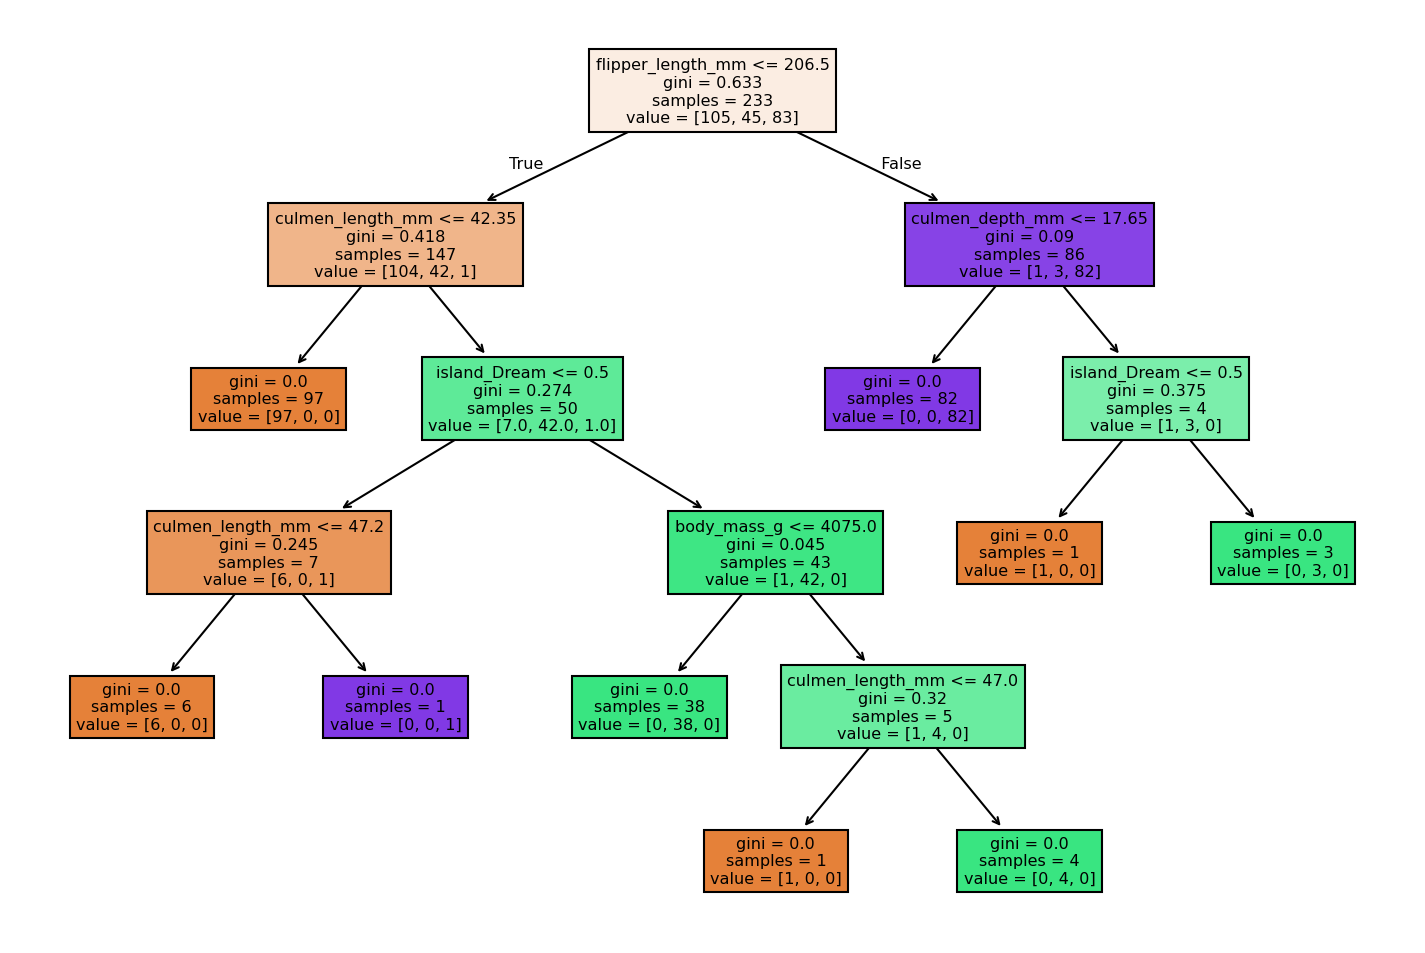

In [76]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

**Reporting Model Results**
To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [79]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [81]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





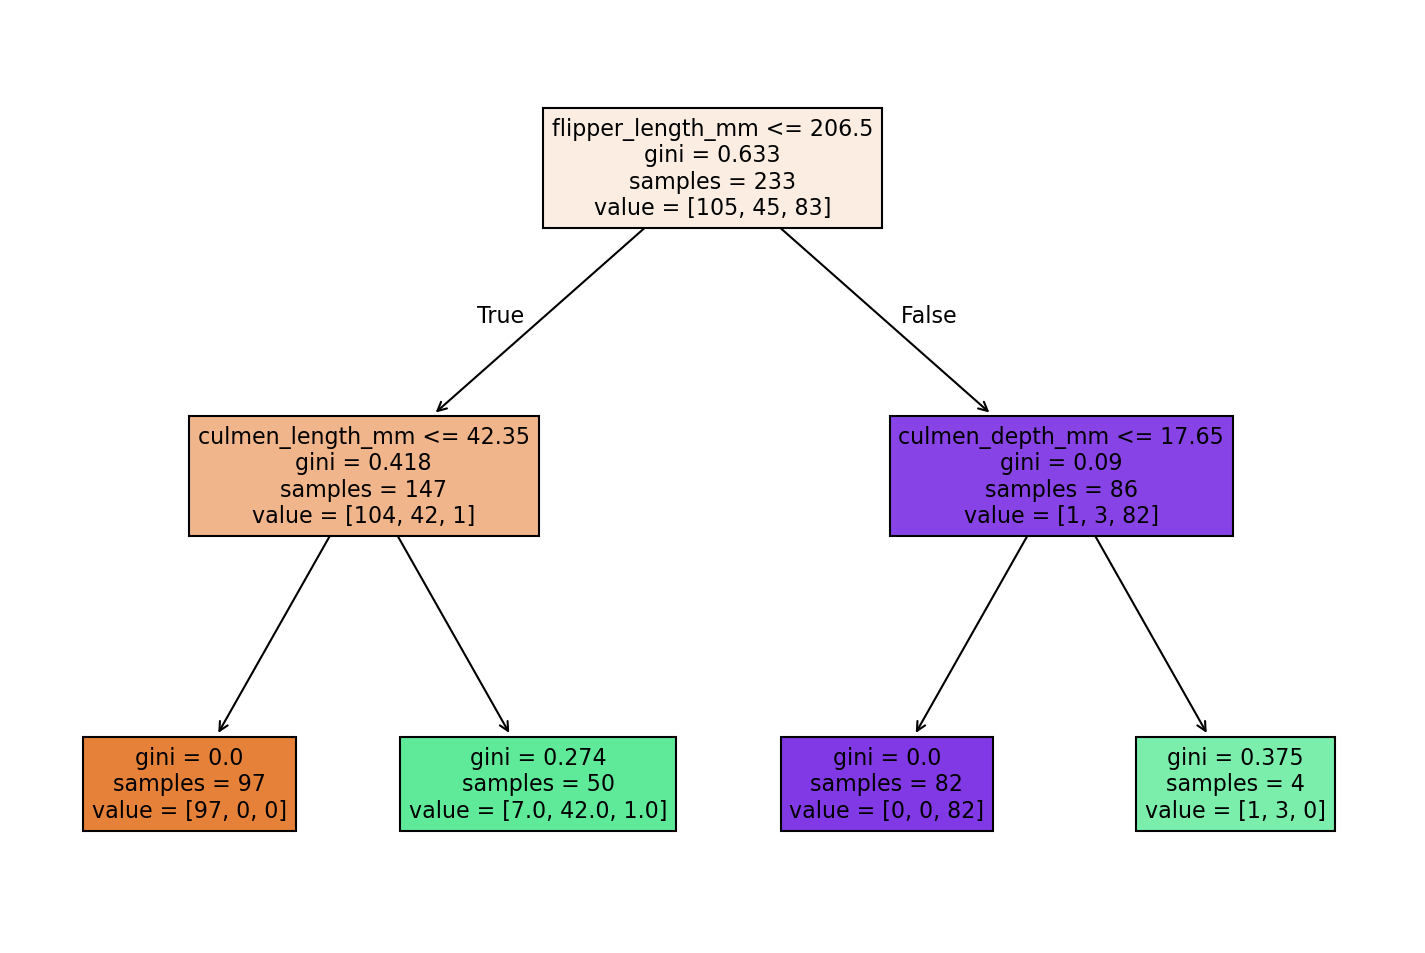

In [83]:
report_model(pruned_tree)

### Max Leaf Nodes

In [86]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





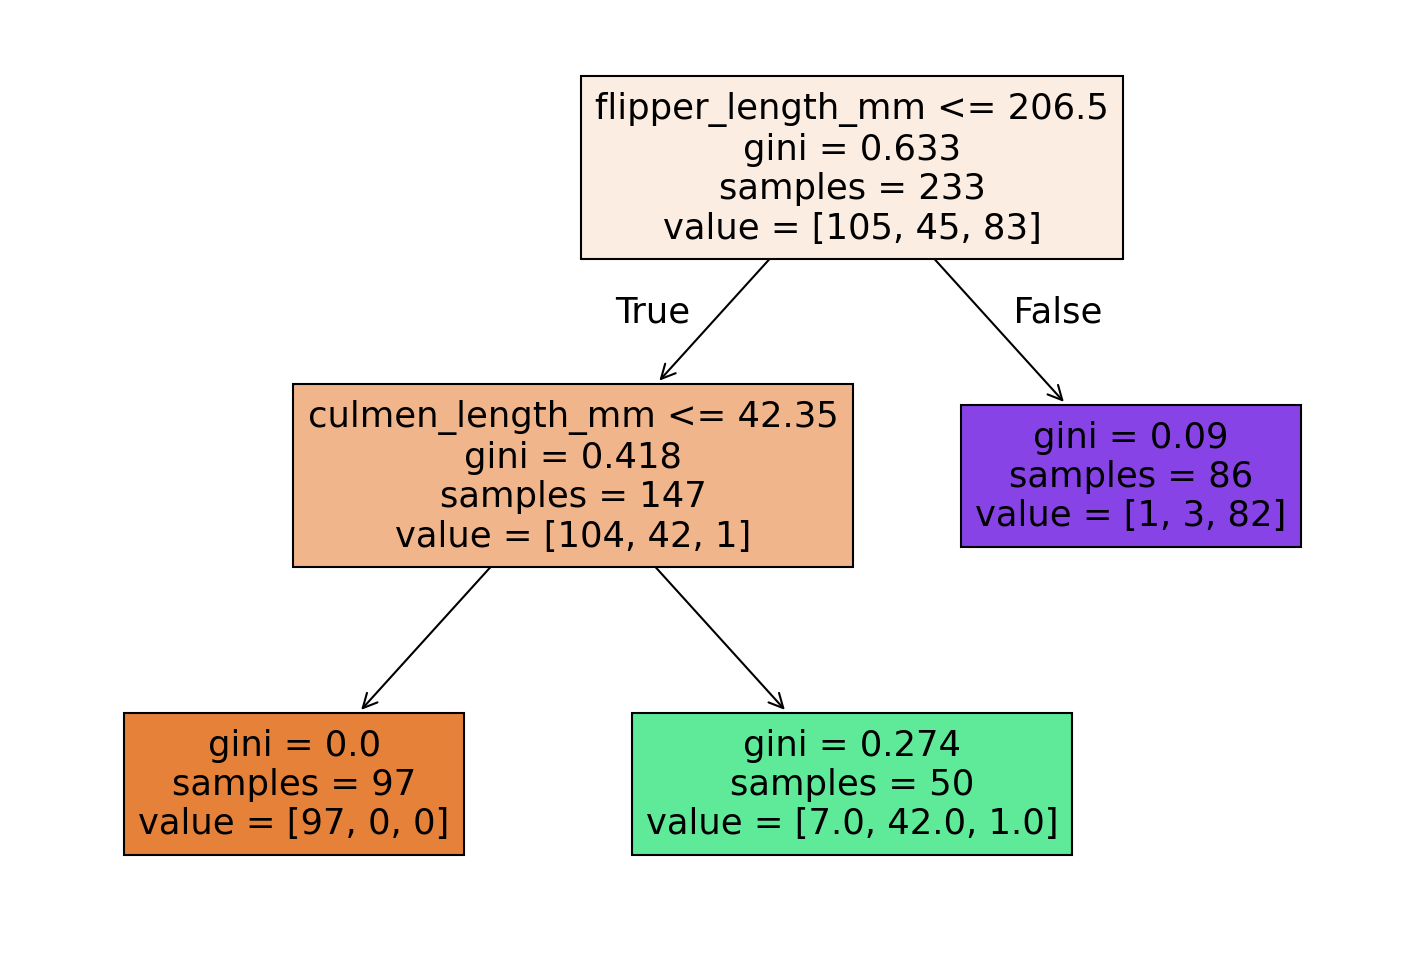

In [88]:
report_model(pruned_tree)

## Criterion

In [91]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





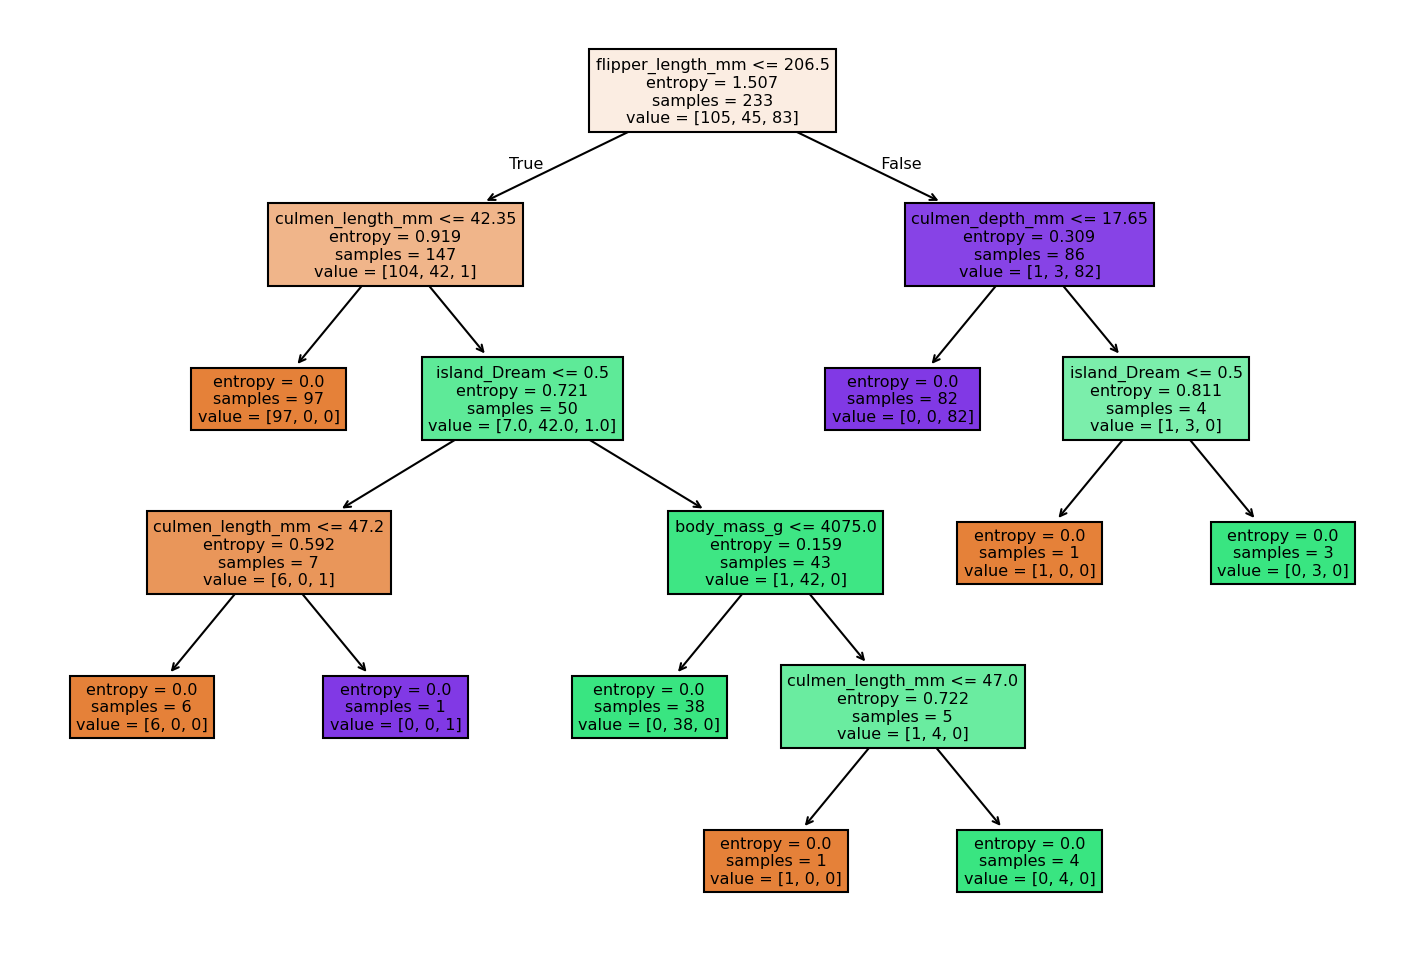

In [93]:
report_model(entropy_tree)

## **Random Forest Classifier**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [102]:
## Train | Test Split
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [114]:
from sklearn.ensemble import RandomForestClassifier

# Corrected model initialization
model = RandomForestClassifier(max_features='sqrt')

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [116]:
preds = model.predict(X_test)

[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



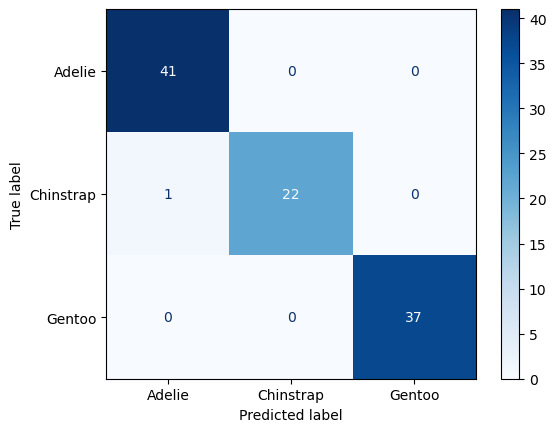

In [120]:
# Predict
preds = model.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')


In [122]:
model.feature_importances_

array([0.30807236, 0.17847792, 0.23491866, 0.1321721 , 0.11184876,
       0.02333229, 0.00677769, 0.00440023])

## **Comparing Models**


- **Random Forest** outperforms the Decision Tree on nearly every metric.
- It **reduces misclassifications**, especially for **Chinstrap** and **Adelie**.
- Also offers **better generalization** by aggregating multiple trees (lower variance).

> 📌 **Conclusion**:  
> **Random Forest is the better model** for this task — offering higher accuracy, more robust predictions, and perfect classification for two out of three classes.


